In [14]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
wel = pd.read_pickle('../../data/trimmed_processed/WELFake.pkl')
isot = pd.read_pickle('../../data/trimmed_processed/FAKE-REAL.pkl')
ind = pd.read_pickle('../../data/trimmed_processed/Indian.pkl')


In [16]:
df = pd.concat([wel,isot,ind])
df.shape
df['label'].value_counts()

label
FAKE    60386
REAL    60375
Name: count, dtype: int64

In [4]:
x = df['text'].astype(str)
y = df['label']

x_train, x_test, y_train, y_test = train_test_split(
    x,y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [5]:
tfidf = TfidfVectorizer(
    stop_words='english',
    max_features=25000,
    max_df=0.8,
    ngram_range=(1,2)
)

x_train_idf = tfidf.fit_transform(x_train)
x_test_idf = tfidf.transform(x_test)

In [6]:
clf = LogisticRegression(max_iter=1000, class_weight='balanced')
clf.fit(x_train_idf,y_train)

y_pred = clf.predict(x_test_idf)

              precision    recall  f1-score   support

        FAKE     0.5774    0.5734    0.5754     12078
        REAL     0.5762    0.5803    0.5783     12075

    accuracy                         0.5768     24153
   macro avg     0.5768    0.5768    0.5768     24153
weighted avg     0.5768    0.5768    0.5768     24153



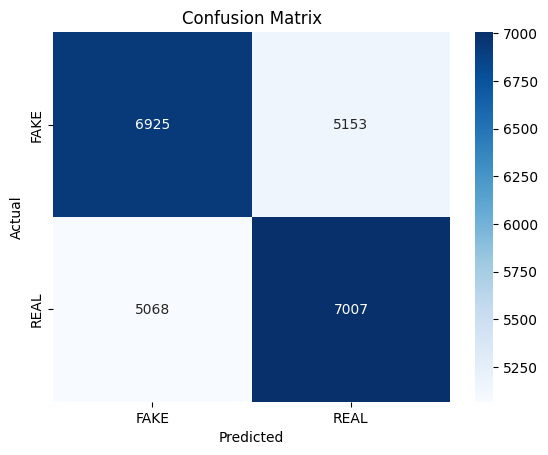

In [7]:
print(classification_report(y_test,y_pred, digits=4))

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues', xticklabels=clf.classes_,yticklabels=clf.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## ROC Curve and other things